<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# PEC 4 respuestas

Autor: Alejandro Prieto Velasco

# Eunciado
Será necesario que generéis funciones que os permitan hacer los siguientes cálculos:

1. Del archivo `covid_approval_polls.csv`:
<br>1.1 Implementad una función que cuente **de forma eficiente** y muestre por pantalla el número de veces que aparecen los patrones descritos (es decir, en cuántas líneas aparece) a continuación en el archivo, incluyendo un mensaje explicativo de los valores que mostráis por pantalla.
<br>Los patrones a considerar son:
   - El término *Huffington Post* 
   - Una url (sea http o https) con formato pdf. Por ejemplo: *https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/73jqd6u5mv/econTabReport.pdf*<br>
    <br>Un ejemplo de *output* sería:
    
    *The pattern Huffington_Post appears X times.*
    
    *The pattern url_pdf appears Y times.*<br>

  <br>1.2 ¿Si tuviéramos un archivo de 1Gb lo harías igual? Si no es así, implementar la solución para este caso.
  <br>1.3 ¿Si tuviéramos 100 archivos de 1Gb cómo lo harías? No hace falta implementar la solución, sólo una pequeña descripción de cómo resolverías el problema.

2. Leer los archivos facilitados de la forma más eficiente teniendo en cuenta las tareas pedidas a continuación y en el ejercicio 3, 4 y 5. Justificar vuestra decisión.
<br>Preparad los datos para cada .csv, obteniendo dos tablas que llamaremos `approval_polls`(proveniente de `covid_approval_polls.csv`) y `concern_polls` (proveniente de `covid_concern_polls.csv`) de forma que se cumplan todos los siguientes requisitos:
     - Sólo estaremos interesados en las entrevistas en las cuales su agente entrevistador (*pollster*) esté en la tabla `pollster_ratings.xlsx`
     - Sólo estaremos interesados en las entrevistas sin *tracking*.
     - Sólo estaremos interesados en las entrevistas en las cuales su agente entrevistador no ha estado vetato (*banned*).

**Nota:** Para leer archivos en formato *xlsx* podéis instalar librerías addicionales en la máquina virtual.


3. Sobre los datos extraídos en el ejercicio 2 de la tabla `approval_polls`, calculad y representad gráficamente:<br>
    <br> 3.1 El número de personas que aprueban (*approve*) y el número de personas que desaprueban (*disapprove*), para las preguntas que contienen las palabras *Trump* y *coronavirus* en el texto. Representaremos estos datos por cada partido (*party*) (*D* (demócratas), *R* (republicanos), *I* (independientes), *all* (personas sin clasificar por partido)).<br>
    


4. Sobre los datos extraídos en el ejercicio 2 de la tabla `concern_polls`, teniendo en cuenta las siguientes transformaciones sobre el grado en la clasificación (*grade*) `*`, calculad y representad gráficamente (excepto el 4.1):<br>
    <br> 4.1 Cuánta gente ha participado en las entrevistas. Representar el resultado por pantalla debidamente formatado.
    <br> 4.2 Cuánta gente en la materia (*subject*) de la entrevista relacionada con la economia (*economy*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.3 Cuál es el porcentaje de gente en la matèria (*subject*) de la entrevista relacionada con la infección (*infected*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.4 Cuántas entrevistas hay por cada nota clasificatoria (*grade*).
    
`*` La nota clasificatoria será reducida a sólo los valores *A, B, C, D, F* teniendo en cuenta que en caso de tener una valoración entre dos categorías nos quedaremos con la inferior. *Ejemplo B/C &#8594; C, B- &#8594; B, B+ &#8594; B*.

5. A partir de los datos del ejercicio 4, crearemos una nueva variable que será la puntuación (credibilidad) que le daremos a ese agente entrevistador. Esta puntuación vendrá dada por:
    
    puntuación = nota evaluada + *Predictive    Plus-Minus*
    
    Donde la nota evaluada se refiere a que la clasificación por *A, B, C, D, F* se evaluará de la siguiente forma:
    A &#8594; 1, B &#8594; 0.5, C &#8594; 0, D &#8594; -0.5, F &#8594; -1
   
   <br> 5.1 Calcular (y representar gráficamente) para aquellas entrevistas que su puntuación sea superior o igual a 1.5:
   
    a) El número de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01 (1 de septiembre de 2020), o después.
    
    b) El porcentaje de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01, o después. (**Nota:** porcentaje respecto el número de personas por cada grupo antes del 2020-09-01 y después).

    <br> 5.2 ¿Qué podéis decir de las dos gráficas obtenidas en el ejercicio anterior (5.1)? ¿Qué conclusiones podéis extraer?


# Respuestas

# Ejercicio 1
<br> Apartado 1.1 

Primero vamos a ejecutar el módulo de carga que contiene los paths de cada archivocomo: `path_approval ="data/covid_approval_polls.csv", path_concer = "data/covid_concern_polls.csv" y path_ratings = "data/pollster_ratings.xlsx"`

También vamos a importar la función count_pattern_bigfile del módulo data_exploration_maipulation. Esta función lee línea a línea el archivo que recibe como path y comprueba si contiene un regex definida en pattern. Tal y como propone el enunciado vamos a probar con el término "Huffington Post" y una url con formato pdf "https?:\/\/.*\.pdf[\s]"

In [1]:
from data_load import path_approval, path_concern, path_ratings
from exploration_manipulation import count_pattern_bigfile

In [2]:
 print('-path_aproval is: "{}"\n-path_concern is: "{}"\n-path_ratings is: "{}"'.format(
     path_approval, path_concern, path_ratings))

-path_aproval is: "data/covid_approval_polls.csv"
-path_concern is: "data/covid_concern_polls.csv"
-path_ratings is: "data/pollster_ratings.xlsx"


In [3]:
count_pattern_bigfile(path=path_approval, pattern="Huffington Post")

'The pattern Huffington Post appears 112 times.'

In [4]:
count_pattern_bigfile(path=path_approval,
                      pattern="https?:\/\/.*\.pdf[\s]")

'The pattern https?:\\/\\/.*\\.pdf[\\s] appears 1304 times.'

<br>Apartado 1.2

Esta función esta diseñada para leer archivos línea a línea lo cual le permite trabajar sin problemas con archivos grandes, ya que en memoría solo habrá una línea cargada a la vez

<br>Apartado 1.3

Si tuviese que cargar 100 archivos de 1 GB cada uno usaría el multithreading, ya que esto no es una tarea que requiera un uso intensivo de CPU y es una tarea en la que se requiere leer del disco, así mientras la CPU espera a leer cada línea puede ir permitiendo que otros hilos se ejecuten de manera concurrente.

# Ejercicio 2

La forma que he elegido es mediantes pandas cargar los datos en un dataframe, después realizar un join con la tabla ratings, añadir la columna que necesite de pollster_ratings, y filtrar los resultados de estos bajo lso criterios descritos en el enunciado. 

El hecho de tomar este camino ha sido básicamente que tanto en este ejercicio como en los siguientes se pide filtrar por columnas del csv pollster_ratings y me ha precido que la opción más sencilla es irle añadiendo al covid_concer o covid_approval la columna del set con los ratings que necesite y después filtrar o hacer las operacione que necesite.

In [5]:
from data_load import approval_polls, concern_polls
approval_polls.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url,Banned by 538
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,no
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,no
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,no
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,no
4,2020-02-09,2020-02-11,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,28.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...,no


In [6]:
concern_polls.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url,Banned by 538
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.0,33.0,23.0,11.0,https://morningconsult.com/wp-content/uploads/...,no
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.0,32.0,25.0,7.0,https://morningconsult.com/wp-content/uploads/...,no
2,2020-02-07,2020-02-09,Morning Consult,NaN,2200,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,23.0,32.0,24.0,9.0,https://morningconsult.com/wp-content/uploads/...,no
3,2020-02-24,2020-02-26,Morning Consult,NaN,2200,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,32.0,37.0,18.0,6.0,https://morningconsult.com/wp-content/uploads/...,no
4,2020-02-24,2020-02-26,Morning Consult,NaN,1994,rv,all,concern-economy,False,How concerned are you that the coronavirus wil...,32.0,39.0,17.0,5.0,https://morningconsult.com/wp-content/uploads/...,no


# Ejercicio 3

In [7]:
from visualizations import graph_approve_party

C:\Users\Asus\OneDrive\Documentos\Data Science, BI and Big Data\MASTER DATA SCIENCE\Programación para la ciencia de datos\PEC 4 - copia\visualizations.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_percentage='approve')
C:\Users\Asus\OneDrive\Documentos\Data Science, BI and Big Data\MASTER DATA SCIENCE\Programación para la ciencia de datos\PEC 4 - copia\visualizations.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_percentage='disapprove')


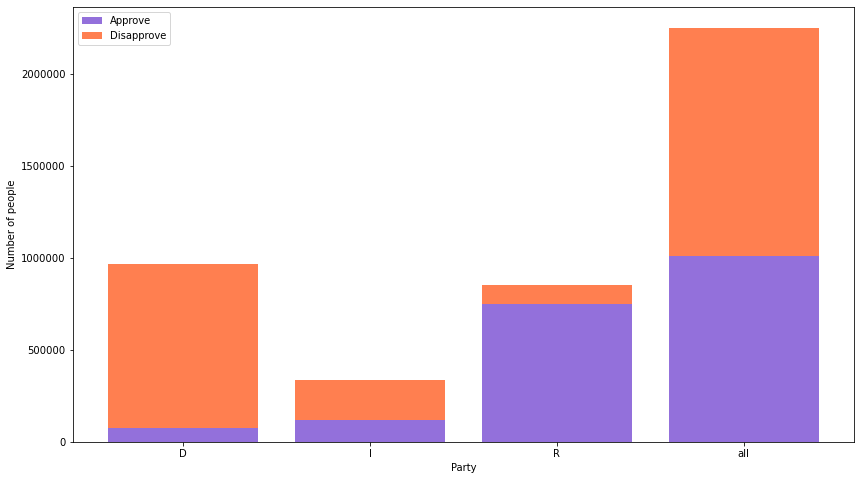

In [8]:
graph_approve_party(df=approval_polls)

# Ejercicio 4

Apartado 4.1

In [9]:
from exploration_manipulation import col_sum
from visualizations import concern_plot

In [10]:
col_sum(df=concern_polls, table_name='concern_polls' , column='sample_size')

'The sum of the column sample_size for the table concern_polls is: 1342211'

Apartado 4.2

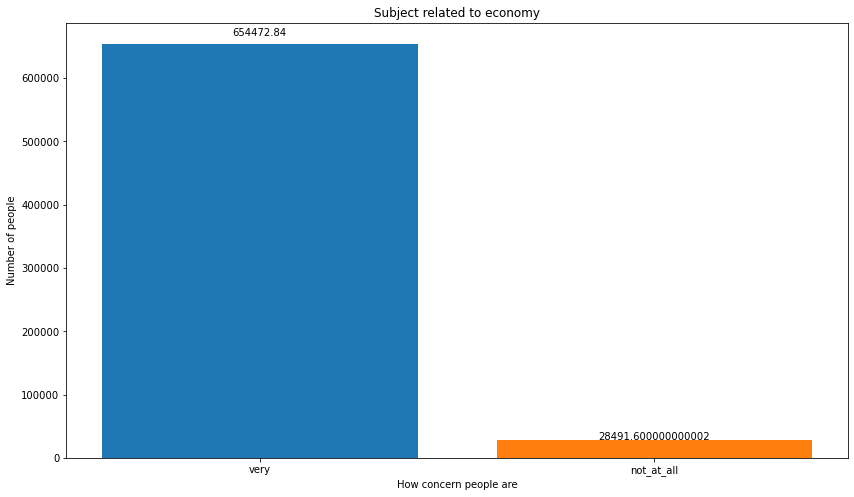

In [11]:
concern_plot(df=concern_polls, df_filter=concern_polls['subject'].str.contains('economy'),columns_concern=[
    'very','not_at_all'], title='Subject related to economy')

Apartado 4.3

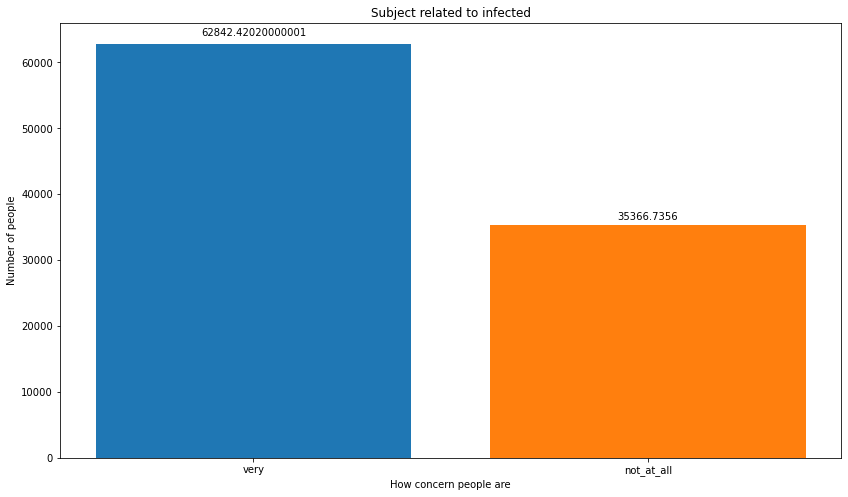

In [12]:
concern_plot(df=concern_polls, df_filter=concern_polls['subject'].str.contains('infected'),columns_concern=[
    'very','not_at_all'],  title='Subject related to infected')

Apartado 4.4

In [13]:
from data_load import concern_grade
from visualizations import concern_grades

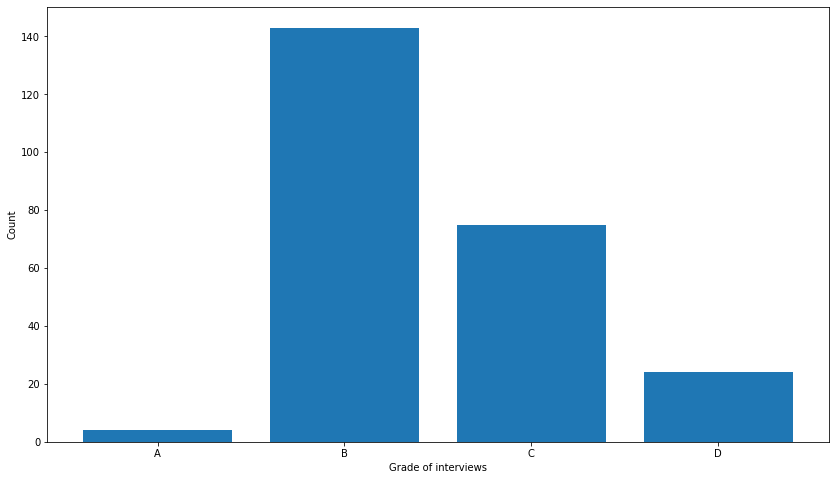

In [14]:
concern_grades(df=concern_grade)

# Ejercicio 5

Apartado 5.1 a)

In [15]:
from data_load import concern_numgrade

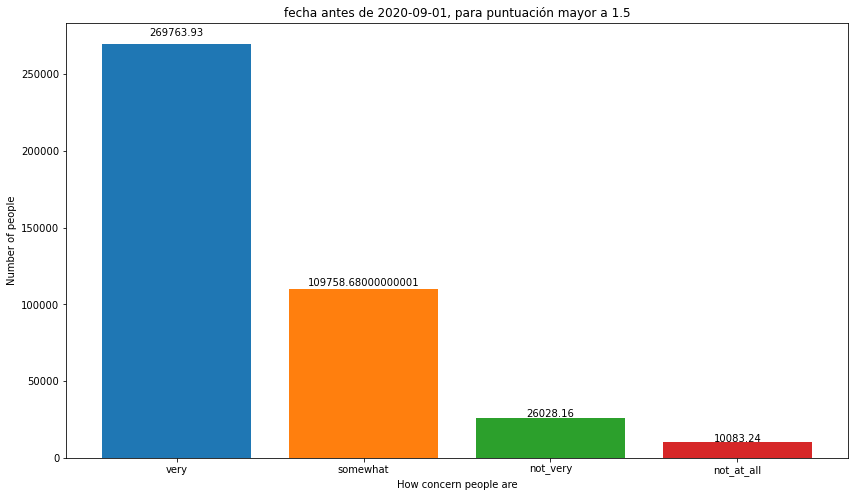

In [16]:
concern_plot(df=concern_numgrade, df_filter=(concern_numgrade['num_grade'] >= 1.5) & (
    concern_numgrade['end_date'] < '2020-09-01'), columns_concern=[
    'very', 'somewhat', 'not_very', 'not_at_all'], title='fecha antes de 2020-09-01, para puntuación mayor a 1.5')

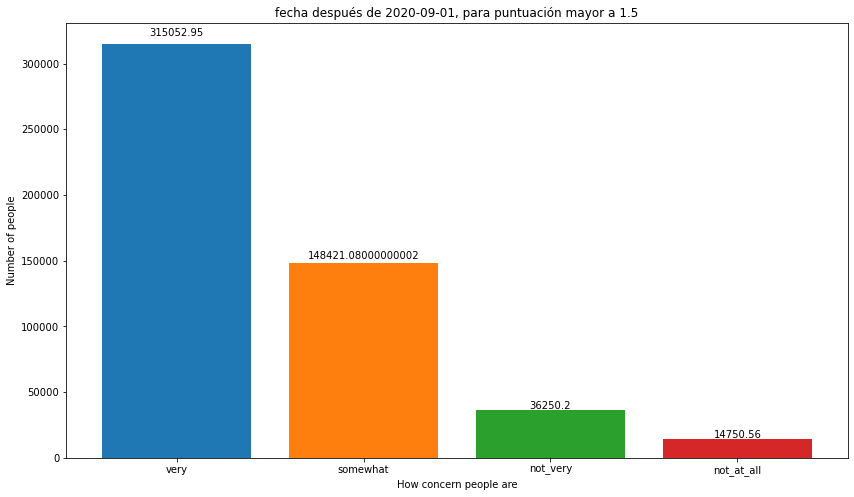

In [17]:
concern_plot(df=concern_numgrade, df_filter=(concern_numgrade['num_grade'] >= 1.5) & (
    concern_numgrade['end_date'] > '2020-09-01'), columns_concern=[
    'very', 'somewhat', 'not_very', 'not_at_all'], title='fecha después de 2020-09-01, para puntuación mayor a 1.5')

Apartado 5.1 b)

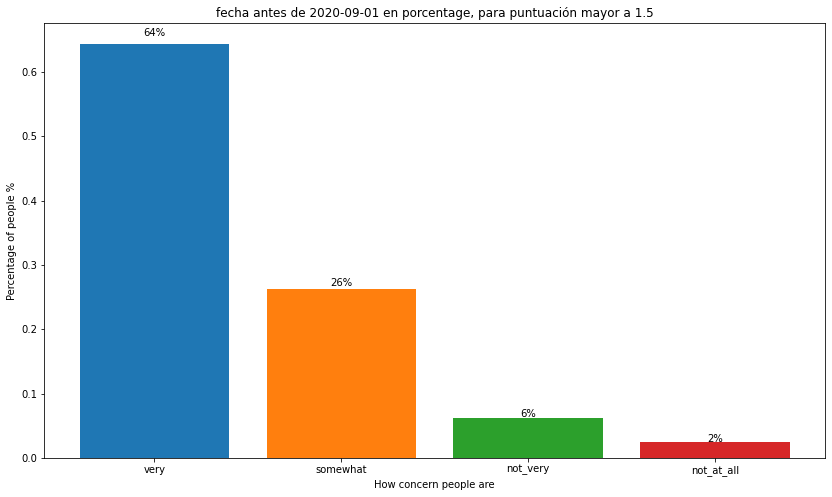

In [18]:
concern_plot(df=concern_numgrade, df_filter=(concern_numgrade['num_grade'] >= 1.5) & (
    concern_numgrade['end_date'] < '2020-09-01'), columns_concern=[
    'very', 'somewhat', 'not_very', 'not_at_all'], percen=True ,title='fecha antes de 2020-09-01 en porcentage, para puntuación mayor a 1.5')

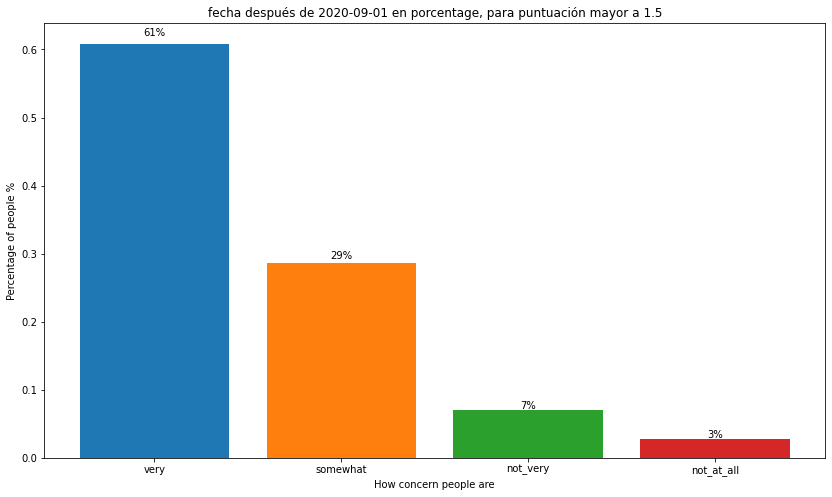

In [19]:
concern_plot(df=concern_numgrade, df_filter=(concern_numgrade['num_grade'] >= 1.5) & (
    concern_numgrade['end_date'] > '2020-09-01'), columns_concern=[
    'very', 'somewhat', 'not_very', 'not_at_all'], percen=True ,title='fecha después de 2020-09-01 en porcentage, para puntuación mayor a 1.5')

Apartado 5.2

Parece ser que hay más gente muy preocupada en términos brutos, pero en terminos porcentules disminuye tras el 1 de septiembre de 2020. La gente que está algo preocupada aumenta tanto en términos porcentuales como en absolutos, al igual que la gente que no esta muy preocupada y la gente que no está nada preocupada.